### Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# shape of the dataset
print("Shape of the dataset:",df.shape)


Shape of the dataset: (891, 12)


### Explore Basic Info

In [42]:
df.head() # Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.describe ()  # Get statistical summary of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handle Missing Values

In [58]:
df.isnull().sum()  # Check for missing values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age values with median


In [74]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing Embarked values with mode

In [75]:
df.drop('Cabin', axis=1, inplace=True)  # Drop the 'cabin' column as it has too many missing values

In [76]:
# Confirming the changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Convert Categorical Features into Numerical (Encoding)

In [77]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # Convert 'Sex' to numerical values using Label Encoding

In [78]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # Convert 'Embarked' to numerical values using One-Hot Encoding

In [ ]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) # Drop columns that won't be used in the model

### Normalize / Standardize Numerical Features

In [ ]:
# Select numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols]) # Scale numerical features using StandardScaler (Z-score normalization)

### Visualize and Remove Outliers

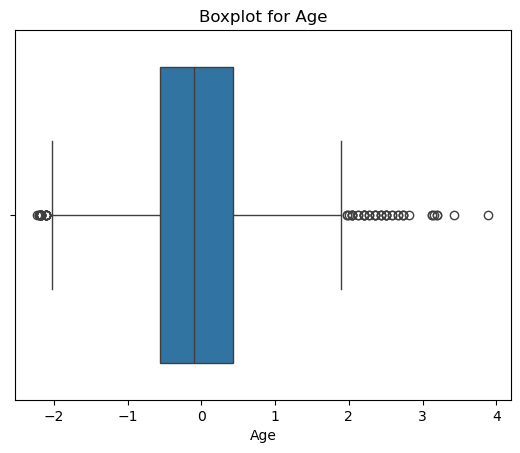

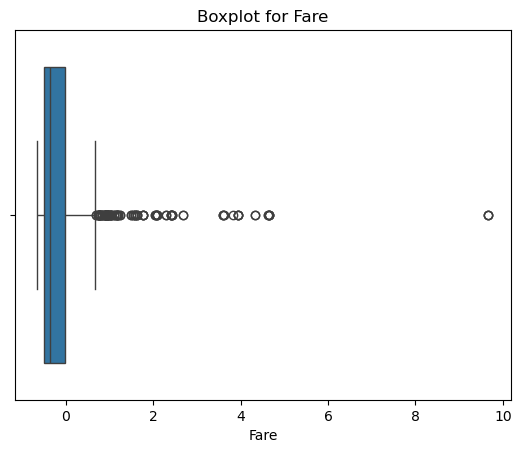

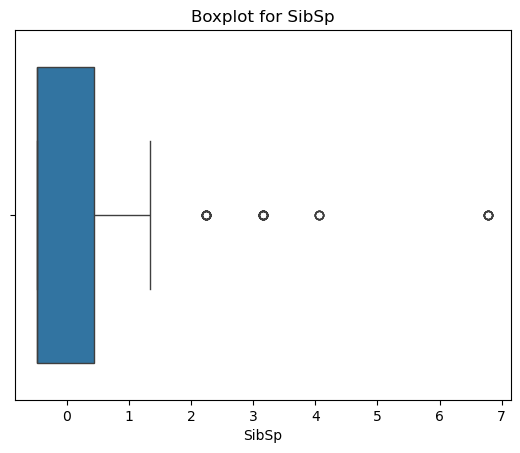

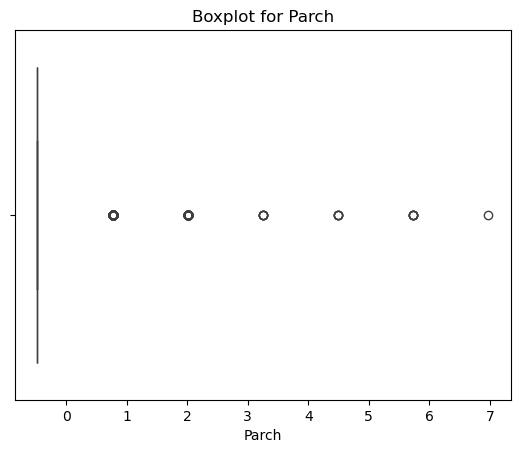

In [82]:
# Boxplot to check for outliers
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


### Final Cleaned Dataset

In [96]:
print(df.head())
print(df.shape)
# Save the cleaned dataset to a new CSV file
df.to_csv('Titanic_Dataset_Cleaned.csv', index=False)

   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736  0.432793 -0.473674 -0.502445       False   
2         1       3    1 -0.258337 -0.474545 -0.473674 -0.488854       False   
3         1       1    1  0.433312  0.432793 -0.473674  0.420730       False   
4         0       3    0  0.433312 -0.474545 -0.473674 -0.486337       False   
5         0       3    0 -0.104637 -0.474545 -0.473674 -0.478116        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  
(577, 9)


### Train Model

In [94]:

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8189655172413793
